In [1]:
import pandas as pd

In [2]:
ruta = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/eng_Latn/eng_latn.tsv"
df = pd.read_csv(ruta, sep="\t")
df["difference"] = df.apply(lambda x: float(x.WDS.split("/")[0])-float(x.WDS.split("/")[1]), axis= 1)
df["score"] = df.WDS.apply(lambda x: float(x.split("/")[0]))

In [3]:
df[df.difference > 0.2].shape

(16, 15)

In [4]:
df[df.difference < -0.2].shape

(206, 15)

In [13]:
df.columns

Index(['id', 'WDS', 'language', 'urls', 'punct', 'sing_chars', 'numbers',
       'repet_seg', 'many_long', 'very_long', 'compression', 'short_seg',
       'text', 'difference'],
      dtype='object')

In [147]:
# x = df[df.difference == 0.0].sample(1).iloc[0]
x = df[(df.score <0.3)].sample(1).iloc[0]
# x = df[df.id == "6b3788bba6a9d41fc3f06927cb55a5a2"].iloc[0]

print(x.id)
print(f"score: {x['WDS']}\nlanguage: {x['language']}\turls: {x['urls']}\t\tpunct: {x['punct']}")
print(f"sing_ch: {x['sing_chars']}\tnumbers: {x['numbers']}\trep_seg: {x['repet_seg']}\tmany_long: {x['many_long']}")
print(f"very_long: {x['very_long']}\tcompression: {x['compression']}\tshort_seg: {x['short_seg']}")
print(x["text"].replace("\\n", "\n"))

9defa3841932d33b28054a2b51185860
score: 0.0/0.29
language: 1.0/1.0	urls: 1.0/1.0		punct: 0.0/0.93
sing_ch: 0.54/0.54	numbers: 0.94/0.94	rep_seg: 1.0/1.0	many_long: 0.0/0.0
very_long: 0.0/0.0	compression: 0.69/0.69	short_seg: 1.0/NaN
11, 0
#Travel #Motivation #lovelife #livelifetothefull #Travelgram #Livelovelearn #Happiness #Onelifeoneshot #lifeiswonderful


In [149]:
dict(x)

{'id': '9defa3841932d33b28054a2b51185860',
 'WDS': '0.0/0.29',
 'language': '1.0/1.0',
 'urls': '1.0/1.0',
 'punct': '0.0/0.93',
 'sing_chars': '0.54/0.54',
 'numbers': '0.94/0.94',
 'repet_seg': '1.0/1.0',
 'many_long': '0.0/0.0',
 'very_long': '0.0/0.0',
 'compression': '0.69/0.69',
 'short_seg': '1.0/NaN',
 'text': '11, 0\\n#Travel #Motivation #lovelife #livelifetothefull #Travelgram #Livelovelearn #Happiness #Onelifeoneshot #lifeiswonderful',
 'difference': np.float64(-0.29),
 'score': np.float64(0.0)}

Text(0.5, 0, 'WDS_refactor')

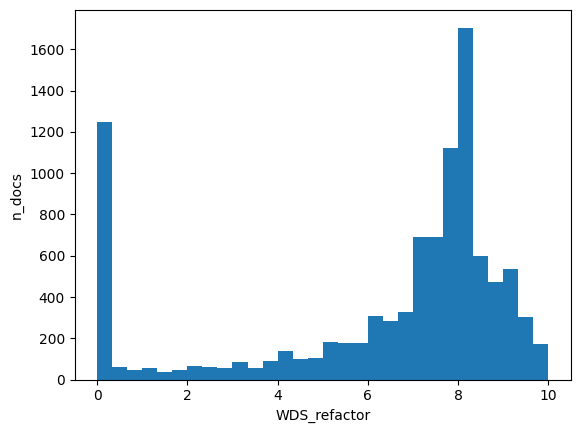

In [55]:
import matplotlib.pyplot as plt
datos = [float(a.split("/")[0])*10 for a in df.WDS.to_list()]
plt.hist(datos, bins=30)  # density=False would make counts
plt.ylabel('n_docs')
plt.xlabel('WDS_refactor')

Text(0.5, 0, 'WDS_old')

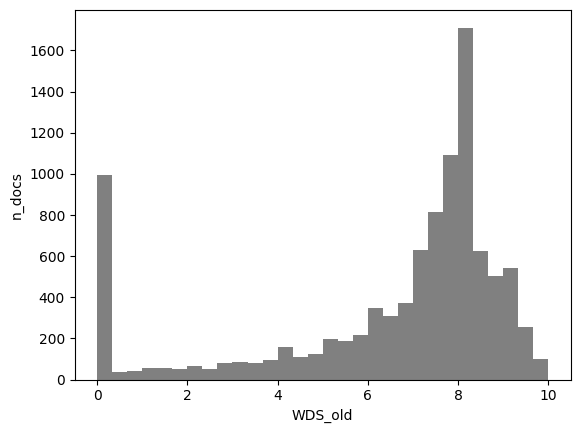

In [56]:
import matplotlib.pyplot as plt
datos = [float(a.split("/")[1])*10 for a in df.WDS.to_list()]
plt.hist(datos, bins=30, color="grey")  # density=False would make counts
plt.ylabel('n_docs')
plt.xlabel('WDS_old')

In [431]:
from collections import Counter

segments = ["a", "b", "a", "c", "b", "a"]

occurr_per_seg = Counter(segments)
repeated = sum(ocur for ocur in occurr_per_seg.values() if ocur > 1)
repetition_ratio = repeated / len(segments)
score = (1 - repetition_ratio)
score

0.16666666666666663

In [432]:
repeated / len(segments)

0.8333333333333334

In [430]:
contador.values()

dict_values([3, 2, 1])

In [268]:
(140 - 70)*2/140

1.0

In [287]:
texto = df[df.repet_seg == df.repet_seg.min()].iloc[0].text

In [285]:
segments = texto.split("\n")
segments = [seg for seg in segments if len(seg) > 4]
if not segments:
    print(1)

num_duplicates = len(segments) - len(set(segments))
repetition_ratio = num_duplicates*2 / len(segments)
score = (1 - repetition_ratio)
score

-0.0117647058823529

In [289]:
df[df.repet_seg == df.repet_seg.min()].iloc[0]

id                              443a0d4d88634d8505bb4f79a25fd1a3
WDS                                                     0.0/0.43
language                                                 1.0/1.0
urls                                                     1.0/1.0
punct                                                  0.94/0.94
sing_chars                                               1.0/1.0
numbers                                                  1.0/1.0
repet_seg                                             -0.01/0.53
many_long                                                1.0/1.0
very_long                                                1.0/1.0
compression                                            0.82/0.82
short_seg                                               0.94/NaN
text           Comment l'aider ?\nCV3344, le 7/22/2020\nBonjo...
difference                                                 -0.43
Name: 7781, dtype: object